In [1]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
print(dataset.shape)

(1020, 70)


In [2]:
dataset.head()

,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [3]:
#remove NAN
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [4]:
dataset = dataset[[
    'ICU_mortality',
 'LOS_Group',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]
dataset.shape

(976, 64)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 1019
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ICU_mortality        976 non-null    int64  
 1   LOS_Group            976 non-null    object 
 2   trauma               976 non-null    int64  
 3   metabolic            976 non-null    int64  
 4   gastrointestinal     976 non-null    int64  
 5   Sepsis               976 non-null    int64  
 6   age                  976 non-null    object 
 7   gender               976 non-null    object 
 8   weight               976 non-null    float64
 9   BMI                  976 non-null    float64
 10  active problems      976 non-null    object 
 11  background problems  976 non-null    object 
 12  feeding              976 non-null    object 
 13  Target_pro_day       976 non-null    float64
 14  pro_to_target_day0   976 non-null    float64
 15  pro_to_target_day1   976 non-null    fl

In [6]:
dataset.shape

(976, 64)

In [7]:
dataset.ICU_mortality.value_counts()

0    741
1    235
Name: ICU_mortality, dtype: int64


# run all featers with pca_components=40

In [9]:
from pycaret.classification import *
model_setup = setup(data=dataset, target='ICU_mortality', data_split_stratify = True,pca = True, pca_components =40)

,Description,Value
0,session_id,7752
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 64)"
5,Missing Values,False
6,Numeric Features,54
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7643,0.0000,0.1033,0.5083,0.1699,0.1043,0.1514,0.0060
lda,Linear Discriminant Analysis,0.7540,0.6305,0.1154,0.4233,0.1797,0.0944,0.1243,0.0080
et,Extra Trees Classifier,0.7511,0.6173,0.0364,0.2667,0.0614,0.0186,0.0353,0.0820
lr,Logistic Regression,0.7497,0.6237,0.1154,0.4276,0.1782,0.0873,0.1188,0.4780
rf,Random Forest Classifier,0.7482,0.5956,0.0548,0.3679,0.0907,0.0306,0.0559,0.1180
gbc,Gradient Boosting Classifier,0.7467,0.5823,0.1099,0.3860,0.1672,0.0752,0.0944,0.1840
lightgbm,Light Gradient Boosting Machine,0.7350,0.5984,0.1217,0.3262,0.1730,0.0612,0.0693,0.0690
nb,Naive Bayes,0.7277,0.6197,0.2555,0.4077,0.3113,0.1523,0.1606,0.0070
qda,Quadratic Discriminant Analysis,0.7276,0.5880,0.1570,0.3382,0.2133,0.0781,0.0852,0.0080
ada,Ada Boost Classifier,0.6970,0.5939,0.2070,0.3065,0.2438,0.0658,0.0681,0.0600


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=7752,
                solver='auto', tol=0.001)


In [15]:
#run svm
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6087,0.0000,0.7059,0.3529,0.4706,0.2116,0.2437
1,0.4638,0.0000,0.7059,0.2727,0.3934,0.0590,0.0811
2,0.4928,0.0000,0.7059,0.2857,0.4068,0.0863,0.1139
3,0.5000,0.0000,0.5294,0.2571,0.3462,0.0145,0.0170
4,0.4559,0.0000,0.6875,0.2558,0.3729,0.0455,0.0634
5,0.4265,0.0000,0.5000,0.2051,0.2909,-0.0642,-0.0825
6,0.6029,0.0000,0.6875,0.3333,0.4490,0.1933,0.2244
7,0.5588,0.0000,0.4375,0.2500,0.3182,0.0267,0.0290
8,0.4853,0.0000,0.5000,0.2286,0.3137,-0.0136,-0.0163
9,0.5588,0.0000,0.5625,0.2812,0.3750,0.0893,0.1021


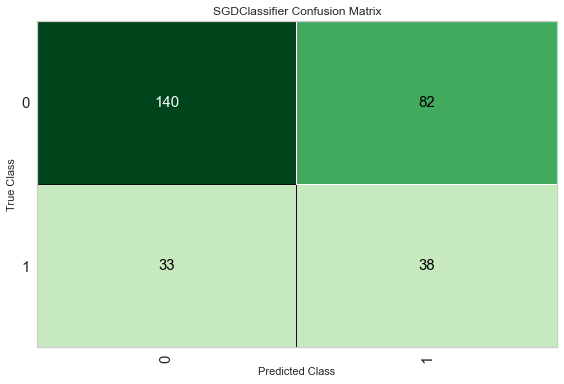

In [16]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# explore by LOS_Group

In [17]:
dataset['LOS_Group'].value_counts()

LOS_8-13    511
LOS_5-7     465
Name: LOS_Group, dtype: int64

In [22]:
LOS_8=dataset[dataset['LOS_Group']=='LOS_8-13']#8-13

In [23]:
LOS_8.head()

,ICU_mortality,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,0,LOS_8-13,0,1,0,1,72,F,65.0,23.875115,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
2,0,LOS_8-13,0,0,1,1,44,M,70.0,22.857143,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
4,0,LOS_8-13,1,1,1,0,60,F,85.0,32.791945,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529
6,0,LOS_8-13,0,0,1,0,64,F,75.0,24.489796,...,0.0,0.000000,0.0,0.0,0.115471,1.116262,1.190400,1.186267,1.632667,1.172213
7,1,LOS_8-13,0,1,1,1,82,M,75.0,29.296875,...,0.0,0.000000,0.0,0.0,0.598987,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
from pycaret.classification import *
model_setup = setup(data=LOS_8, target='ICU_mortality', data_split_stratify = True,pca = True, pca_components =40,normalize=True)

,Description,Value
0,session_id,3274
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(511, 64)"
5,Missing Values,False
6,Numeric Features,53
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
#for more info: https://pycaret.org/tune-model/
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.0000,0.3333,0.2000,0.2500,-0.0909,-0.0976
1,0.5000,0.0000,0.6667,0.2857,0.4000,0.0769,0.0976
2,0.5000,0.0000,0.5556,0.2632,0.3571,0.0270,0.0321
3,0.5833,0.0000,0.9000,0.3913,0.5455,0.2582,0.3371
4,0.6944,0.0000,0.9000,0.4737,0.6207,0.4036,0.4624
5,0.6389,0.0000,0.7000,0.4118,0.5185,0.2595,0.2830
6,0.5833,0.0000,0.8000,0.3810,0.5161,0.2241,0.2726
7,0.6571,0.0000,0.5556,0.3846,0.4545,0.2164,0.2242
8,0.5143,0.0000,0.3333,0.2143,0.2609,-0.0759,-0.0801
9,0.5429,0.0000,0.6667,0.3158,0.4286,0.1223,0.1462


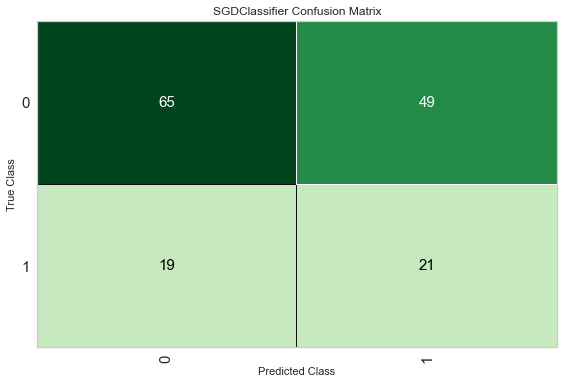

In [26]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [27]:
LOS_5=dataset[dataset['LOS_Group']=='LOS_5-7']

In [28]:
LOS_5=LOS_5[[
        'ICU_mortality',
 'LOS_Group',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'

,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
 
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg' 
]]

In [29]:
LOS_5.shape

(465, 46)

In [30]:
from pycaret.classification import *
model_setup = setup(data=LOS_5, target='ICU_mortality', data_split_stratify = True,pca = True, pca_components =40,normalize=True)#for more info: https://pycaret.org/tune-model/
#for more info: https://pycaret.org/tune-model/
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5455,0.0000,0.7143,0.2778,0.4000,0.1361,0.1759
1,0.6364,0.0000,0.7143,0.3333,0.4545,0.2326,0.2707
2,0.4242,0.0000,0.0000,0.0000,0.0000,-0.3660,-0.3922
3,0.6364,0.0000,0.7143,0.3333,0.4545,0.2326,0.2707
4,0.3636,0.0000,0.5000,0.1905,0.2759,-0.1159,-0.1604
5,0.5938,0.0000,0.8571,0.3333,0.4800,0.2409,0.3143
6,0.7812,0.0000,0.5714,0.5000,0.5333,0.3913,0.3928
7,0.4688,0.0000,0.5714,0.2222,0.3200,0.0073,0.0095
8,0.5938,0.0000,0.4286,0.2500,0.3158,0.0545,0.0586
9,0.5625,0.0000,0.4286,0.2308,0.3000,0.0218,0.0240
